In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
delay_injection = 10
delay_amplitude = 0.1

proper_sampling = np.arange(0, 100, 1, dtype=np.float64)
interval_priority_sampling = proper_sampling + np.heaviside(np.arange(-1 * delay_injection, 100 - delay_injection, 1), 1) * delay_amplitude
increment_priority_sampling = proper_sampling.copy()
increment_priority_sampling[delay_injection] += delay_amplitude

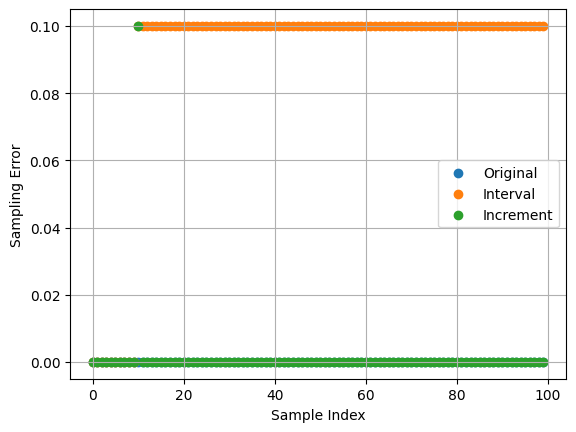

In [3]:
fig = plt.figure()
ax = fig.add_subplot(111)

ax.scatter(np.arange(len(proper_sampling)), proper_sampling - proper_sampling, label='Original')
ax.scatter(np.arange(len(interval_priority_sampling)), interval_priority_sampling - proper_sampling, label='Interval')
ax.scatter(np.arange(len(increment_priority_sampling)), increment_priority_sampling - proper_sampling, label='Increment')
ax.legend()
ax.set_ylabel('Sampling Error')
ax.set_xlabel('Sample Index')
ax.grid()

In [4]:
def signal(x):
    return np.sin(x * 2 * np.pi / 15)

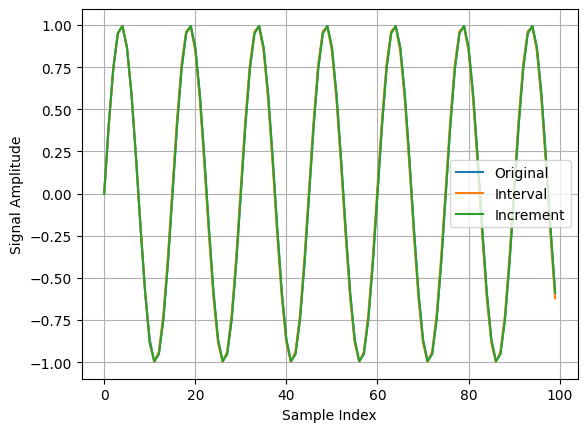

In [5]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(np.arange(len(proper_sampling)), signal(proper_sampling), label='Original')
ax.plot(np.arange(len(interval_priority_sampling)), signal(interval_priority_sampling), label='Interval')
ax.plot(np.arange(len(increment_priority_sampling)), signal(increment_priority_sampling), label='Increment')
ax.grid()

ax.set_ylabel('Signal Amplitude')
ax.set_xlabel('Sample Index')
ax.legend()

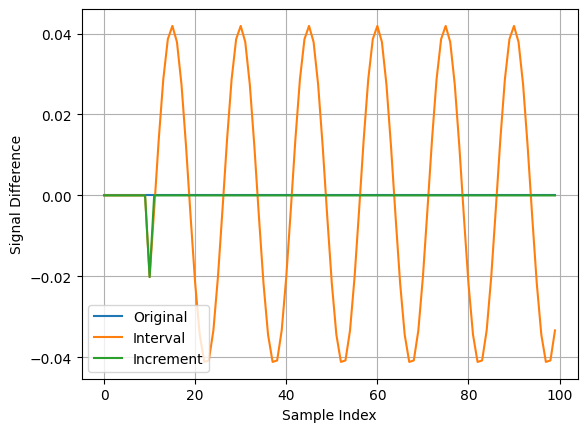

In [6]:
fig = plt.figure()
ax = fig.add_subplot(111)
reference_signal = signal(proper_sampling)
ax.plot(np.arange(len(proper_sampling)), reference_signal - reference_signal, label='Original')
ax.plot(np.arange(len(interval_priority_sampling)), signal(interval_priority_sampling) - reference_signal, label='Interval')
ax.plot(np.arange(len(increment_priority_sampling)), signal(increment_priority_sampling) - reference_signal, label='Increment')
ax.grid()

ax.set_ylabel('Signal Difference')
ax.set_xlabel('Sample Index')
ax.legend()

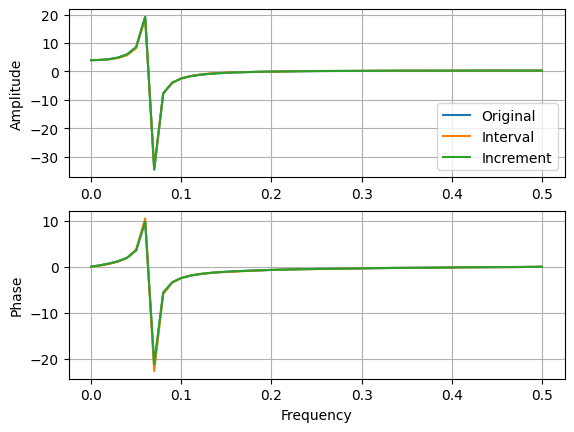

In [7]:
fig = plt.figure()
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212, sharex=ax1)

proper_sampling_spectrum = np.fft.rfft(signal(proper_sampling))
interval_sampling_spectrum = np.fft.rfft(signal(interval_priority_sampling))
increment_sampling_spectrum = np.fft.rfft(signal(increment_priority_sampling))
ax1.plot(np.fft.rfftfreq(len(proper_sampling)), proper_sampling_spectrum.real, label='Original')
ax1.plot(np.fft.rfftfreq(len(interval_priority_sampling)), interval_sampling_spectrum.real, label='Interval')
ax1.plot(np.fft.rfftfreq(len(increment_priority_sampling)), increment_sampling_spectrum.real, label='Increment')
ax2.plot(np.fft.rfftfreq(len(proper_sampling)), proper_sampling_spectrum.imag)
ax2.plot(np.fft.rfftfreq(len(interval_priority_sampling)), interval_sampling_spectrum.imag)
ax2.plot(np.fft.rfftfreq(len(increment_priority_sampling)), increment_sampling_spectrum.imag)

ax1.grid()
ax2.grid()
ax1.set_ylabel('Amplitude')
ax2.set_ylabel('Phase')
ax2.set_xlabel('Frequency')
ax1.legend()

Text(0.5, 0, 'Frequency')

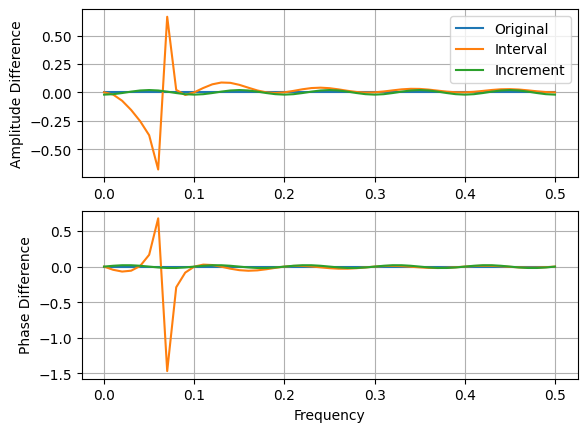

In [8]:
fig = plt.figure()
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212, sharex=ax1)

ax1.plot(np.fft.rfftfreq(len(proper_sampling)), proper_sampling_spectrum.real - proper_sampling_spectrum.real, label='Original')
ax1.plot(np.fft.rfftfreq(len(interval_priority_sampling)), interval_sampling_spectrum.real - proper_sampling_spectrum.real, label='Interval')
ax1.plot(np.fft.rfftfreq(len(increment_priority_sampling)), increment_sampling_spectrum.real - proper_sampling_spectrum.real, label='Increment')
ax2.plot(np.fft.rfftfreq(len(proper_sampling)), proper_sampling_spectrum.imag - proper_sampling_spectrum.imag)
ax2.plot(np.fft.rfftfreq(len(interval_priority_sampling)), interval_sampling_spectrum.imag - proper_sampling_spectrum.imag)
ax2.plot(np.fft.rfftfreq(len(increment_priority_sampling)), increment_sampling_spectrum.imag - proper_sampling_spectrum.imag)

ax1.grid()
ax2.grid()
ax1.legend()
ax1.set_ylabel('Amplitude Difference')
ax2.set_ylabel('Phase Difference')
ax2.set_xlabel('Frequency')